C:\Users\Sana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sana\anaconda3\Lib\site-packages\sklearn\cluster\_k

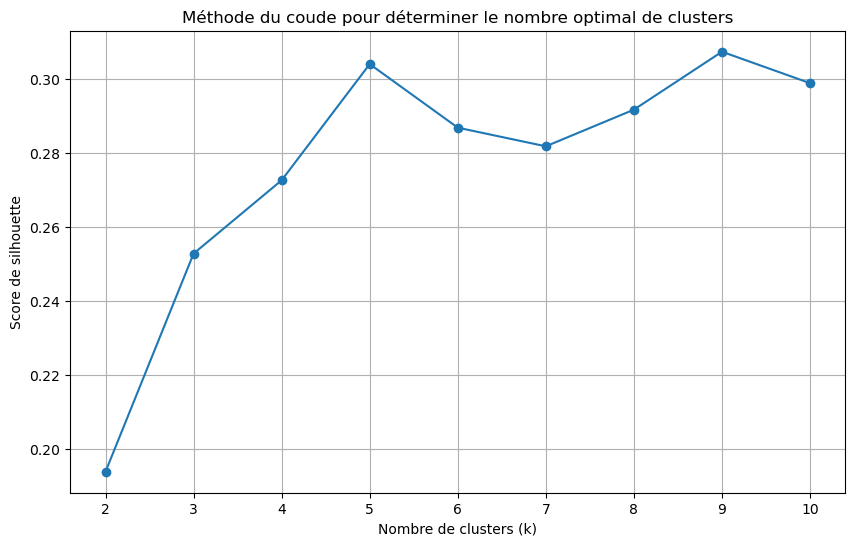

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import os 

#Upload data
data_path = 'DATA.xlsx'
data = pd.read_excel(data_path, engine='openpyxl')

# Identifying numerical and categorical columns
colonnes_numeriques = ['MT_ACCORD_boxcox', 'Revenu_residual', 'DURP_residual', 'Age_boxcox']
colonnes_categorielles = ['CATEGORIE', 't24_Profession', 't18_Genre']

# Prepare data (standardize and normalize numerical data and encode categorical data with one hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('standard', StandardScaler()),
            ('normal', MinMaxScaler())
        ]), colonnes_numeriques),
        ('cat', OneHotEncoder(), colonnes_categorielles)
    ])

data_preprocessed = preprocessor.fit_transform(data.drop('I_CLASS', axis=1))


# a list to store silhoutte scores
silhouette_scores = []

# Max number of clusters
max_clusters = 10

# Calculate silhouette score for each k
for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_preprocessed)
    silhouette_avg = silhouette_score(data_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# PLot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xticks(range(2, max_clusters+1))
plt.grid(True)
plt.show()
